In [21]:
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv('online_fraud_dataset.csv')
df.sample(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
487933,19,CASH_OUT,97801.13,C1926317630,49129.00,0.00,C1646966276,193099.56,173616.34,0,0
3495485,259,CASH_OUT,63863.61,C711761733,0.00,0.00,C1384249206,4228925.45,4292789.06,0,0
6073861,514,PAYMENT,6203.98,C764310658,457545.07,451341.08,M87665614,0.00,0.00,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
stratify_column = df['isFraud']

# Split the data
df_sampled, _ = train_test_split(df, test_size=0.7, stratify=stratify_column)

print(df_sampled.shape)

(1908786, 11)


In [ ]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

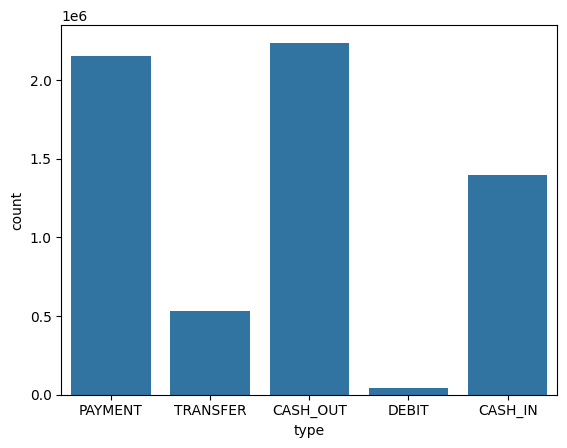

In [ ]:
sns.countplot(data = df, x = 'type')

In [ ]:
df[df['isFraud']==1][['type']].value_counts()

type    
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

In [9]:
df_fraud = df[df['isFraud']==1]

In [12]:
df_notfraud = df[df['isFraud']==0].sample(n=8213, random_state=1)
df_notfraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1697235,159,CASH_IN,290448.64,C683933272,49671.00,340119.64,C948751934,34047.63,0.00,0,0
491213,19,PAYMENT,7521.26,C1434220511,0.00,0.00,M2098189366,0.00,0.00,0,0
2663119,210,PAYMENT,12043.69,C1632575026,0.00,0.00,M83346807,0.00,0.00,0,0
5159889,357,CASH_IN,120116.21,C835727091,97688.68,217804.90,C2084926563,849069.38,728953.17,0,0
2707009,211,CASH_OUT,115161.12,C1656739705,0.00,0.00,C778089718,576802.51,691963.63,0,0


In [13]:
print("shape of df_fraud", df_fraud.shape)
print("shape of df_notfraud", df_notfraud.shape)

shape of df_fraud (8213, 11)
shape of df_notfraud (8213, 11)


In [14]:
sample_df = pd.concat([df_fraud, df_notfraud], axis=0, ignore_index=True)
print("shape of df_fraud", sample_df.shape)

shape of df_fraud (16426, 11)


In [5]:
sample_df = pd.read_pickle("sample_df.pkl")
sample_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
16421,39,CASH_IN,350258.30,C2051713769,631.00,350889.30,C779755439,804931.80,454673.49,0,0
16422,542,CASH_OUT,2513.85,C771269342,21608.00,19094.15,C1092577223,9414586.35,9417100.20,0,0
16423,308,CASH_OUT,4390.62,C1183188250,41913.00,37522.38,C385526155,362457.97,366848.58,0,0
16424,34,PAYMENT,3855.74,C324540645,796208.46,792352.73,M1893133120,0.00,0.00,0,0


<Axes: xlabel='type', ylabel='count'>

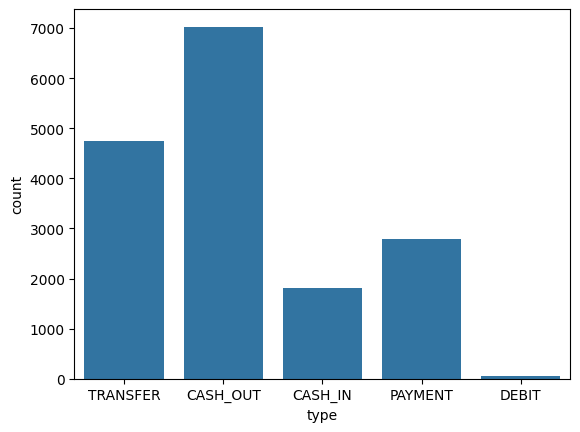

In [6]:
sns.countplot(data = sample_df, x = 'type')

<Axes: xlabel='amount'>

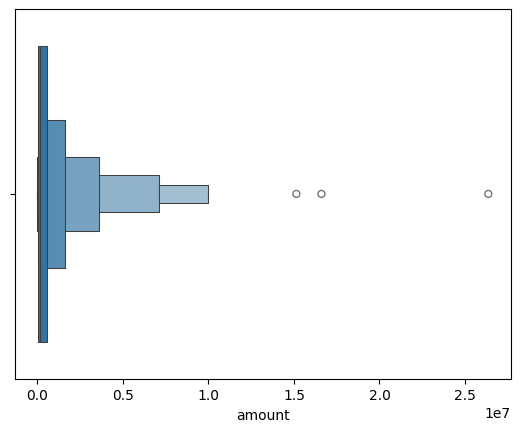

In [22]:
sns.boxenplot(sample_df, x='amount')

In [7]:
sample_df.drop(columns=['nameOrig', 'nameDest', 'step'], inplace=True)

In [8]:
sample_df.sample(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15871,PAYMENT,1893.71,269016.62,267122.91,0.00,0.00,0,0
9578,PAYMENT,43317.18,98895.29,55578.10,0.00,0.00,0,0
15212,TRANSFER,472375.27,0.00,0.00,2183016.81,2655392.08,0,0
2641,TRANSFER,210691.92,210691.92,0.00,0.00,0.00,1,0
16333,CASH_OUT,404942.49,52125.00,0.00,182089.65,863937.55,0,0


In [10]:
# Define the feature columns and target
features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['type']),  # One-hot encode 'A' and 'B'
        ('scaler', StandardScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])       # Standard scale 'C'
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [12]:
# Separate features and target
X = sample_df[features]
y = sample_df[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=21)

In [14]:
# Fit the pipeline to the data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['type']),
                                                 ('scaler', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('classifier', LogisticRegression())])

In [17]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9151304347826087


In [19]:
# Optional: Transform the test data and display it
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
print(pd.DataFrame(X_test_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out()))

# Display the predictions
print("Predictions:", y_pred)
print("Actual:", y_test.values)

      onehot__type_CASH_IN  onehot__type_CASH_OUT  onehot__type_DEBIT  \
0                      0.0                    0.0                 0.0   
1                      0.0                    1.0                 0.0   
2                      0.0                    0.0                 0.0   
3                      0.0                    1.0                 0.0   
4                      0.0                    1.0                 0.0   
...                    ...                    ...                 ...   
5745                   0.0                    0.0                 0.0   
5746                   1.0                    0.0                 0.0   
5747                   0.0                    1.0                 0.0   
5748                   0.0                    1.0                 0.0   
5749                   0.0                    1.0                 0.0   

      onehot__type_PAYMENT  onehot__type_TRANSFER  scaler__amount  \
0                      1.0                    0.0     

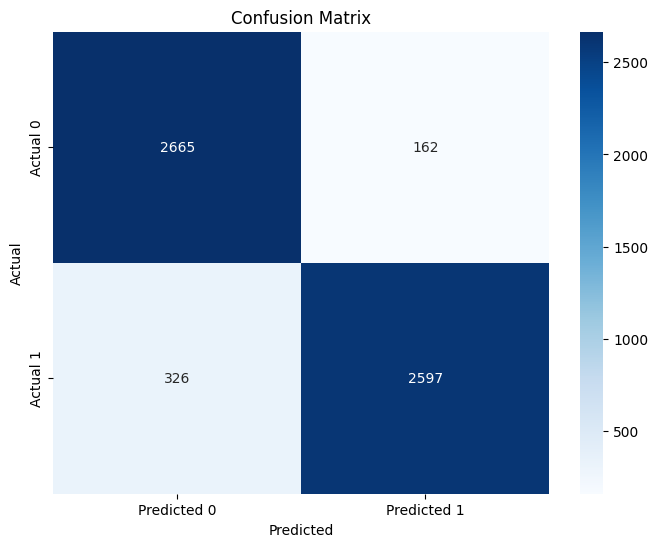

In [22]:
# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      2827
           1       0.94      0.89      0.91      2923

    accuracy                           0.92      5750
   macro avg       0.92      0.92      0.92      5750
weighted avg       0.92      0.92      0.92      5750



In [ ]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.9112963656800299
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      5386
           1       0.93      0.89      0.91      5290

    accuracy                           0.91     10676
   macro avg       0.91      0.91      0.91     10676
weighted avg       0.91      0.91      0.91     10676



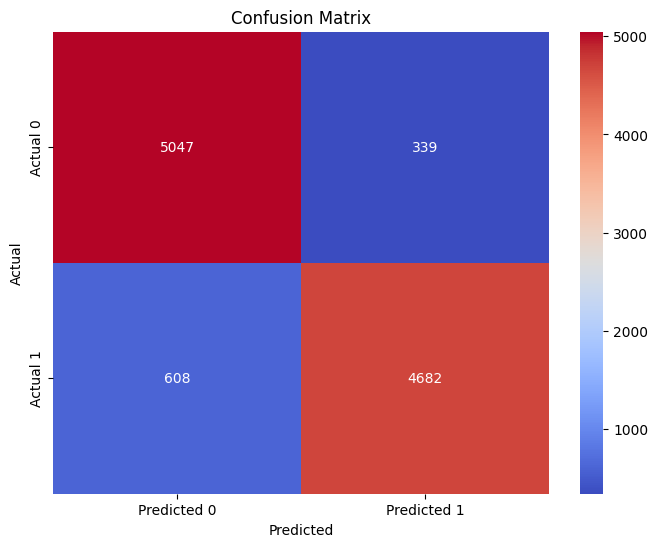

In [25]:
# Make predictions on the test data
y_pred = pipeline.predict(X_train)

# Calculate the accuracy score
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the classification report
class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{"type": ["CASH_OUT", "TRANSFER", "PAYMENT"], "amount": [1084144.37, 85017.99, 1310.75], "oldbalanceOrg": [1084144.37, 85017.99, 152954.0], "newbalanceOrig": [0.0, 0.0, 151643.25], "oldbalanceDest": [13948.07, 0.0, 0.0], "newbalanceDest": [1098092.44, 0.0, 0.0]}'